# Seaborn
- metplotlib의 성능 및 디자인을 업그레이드
- Pandas의 DataFrame을 대상으로 시각화 한다
- EDA(Exploring Data Analysis)작업에 많이 사용한다
- URL : http://seaborn.pydata.org

In [ ]:
pip list

# 실습 데이터셋 확인

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# 데이터셋 준비
# seaborn 데이터셋 위치: https://github.com/mwaskom/seaborn-data
df = sns.load_dataset('mpg')   # DataFrame 객체로 데이터셋 반환
display(df.head())  # head(): 데이터프레임의 상위 5개 데이터를 불러온다
print(df.shape)  # 행과 열의 크기를 튜플값으로 출력

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


(398, 9)


In [9]:
# 데이터 요약본
df.info()   # 컬럼명, null값이 없는 레코드의 개수(결측치개수), 데이터 타입

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [10]:
# 기술통계 확인하기
# 수치형 컬럼에 대해서만 기술통계값을 출력, (행개수, 평균, 표준편차, 최소값, 1사분위 ...)
# 컬럼의 편차를 확인하여 편차가 심한 경우 전처리 과정을 통해 정제 필요
df.describe()  

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [11]:
# 문자형 데이터에 대해 기술통계 확인하기
# 행 개수, unique값, 최빈값
df.describe(include='object')

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


In [13]:
df['origin'].value_counts()   # 데이터셋[]: 컬럼 조회, value_counts(): 데이터의 빈도수 구하기

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

# 관계형 그래프

## relplot()
- 변수간의 상관성을 시각화하는 그래프
- 매개변수 kind='scatter'나 kind='line'을 통해 그래프의 종류를 선택할 수 있다
- 매개변수를 지정하지 않으면 default = scatter
- 매개변수 hue를 통해 범주형 데이터별 포인트의 색깔을 다르게 지정할 수 있다

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


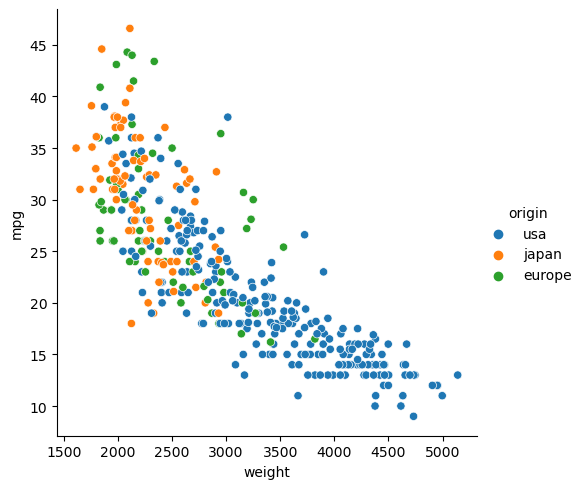

In [17]:
sns.relplot(data=df, x='weight', y='mpg', kind='scatter', hue='origin')  # 무게와 연비의 관계(음)
plt.show()

- col 매개변수에 범주형 컬럼을 지정하면 해당 컬럼의 범주 값 만큼 그래프를 분할하여 그려준다.

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


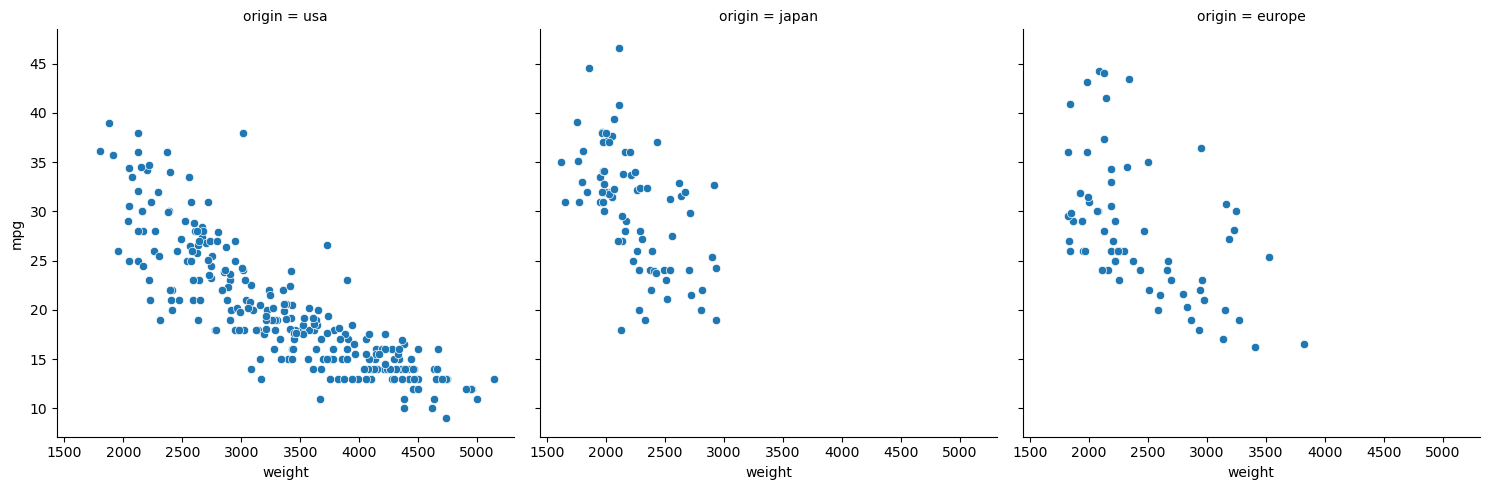

In [18]:
sns.relplot(data=df, x='weight', y='mpg', kind='scatter', col='origin') 
plt.show()

## regplot()
- 선형 회귀선을 추가적으로 그려주는 그래프
- y = wx + b: 선형회귀식, 새로운 데이터 x가 들어왔을 때 y값 추정가능

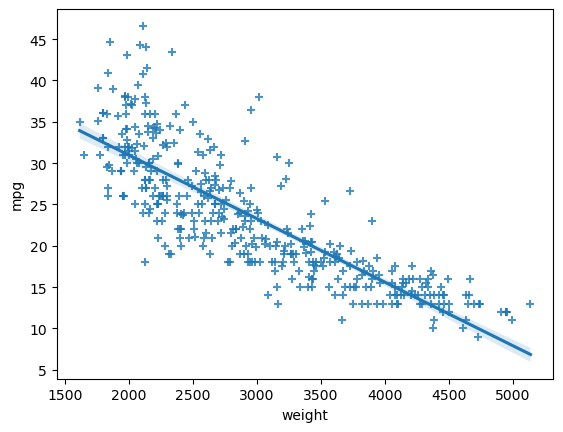

In [22]:
sns.regplot(data=df, x='weight', y='mpg', marker='+')
plt.show()

## lmplot()
- 데이터의 산점도와 함께 선형회귀 모델 적합을 플롯팅한다.

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


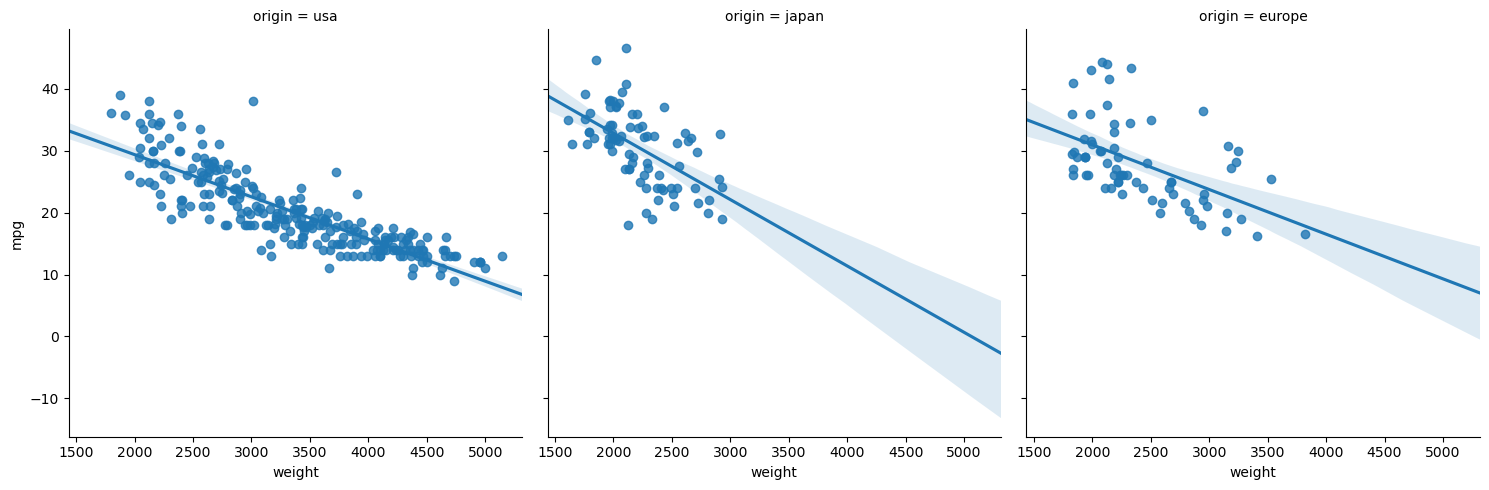

In [24]:
sns.lmplot(data=df, x='weight', y='mpg', col='origin', truncate=False)  # truncate=False: 선형회귀선이 잘리지않도록
plt.show()
# 선 주변의 반투명 구간: 오차범위 내 신뢰구간

## pairplot()
- 각 변수들의 분포와 모든 변수들간의 분포 관계를 보여준다
- 시간이 오래걸림 -> 원하는 컬럼만 추출해서 그리는 경우가 많음
- vars: 보고 싶은 컬럼명을 리스트로 전달

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


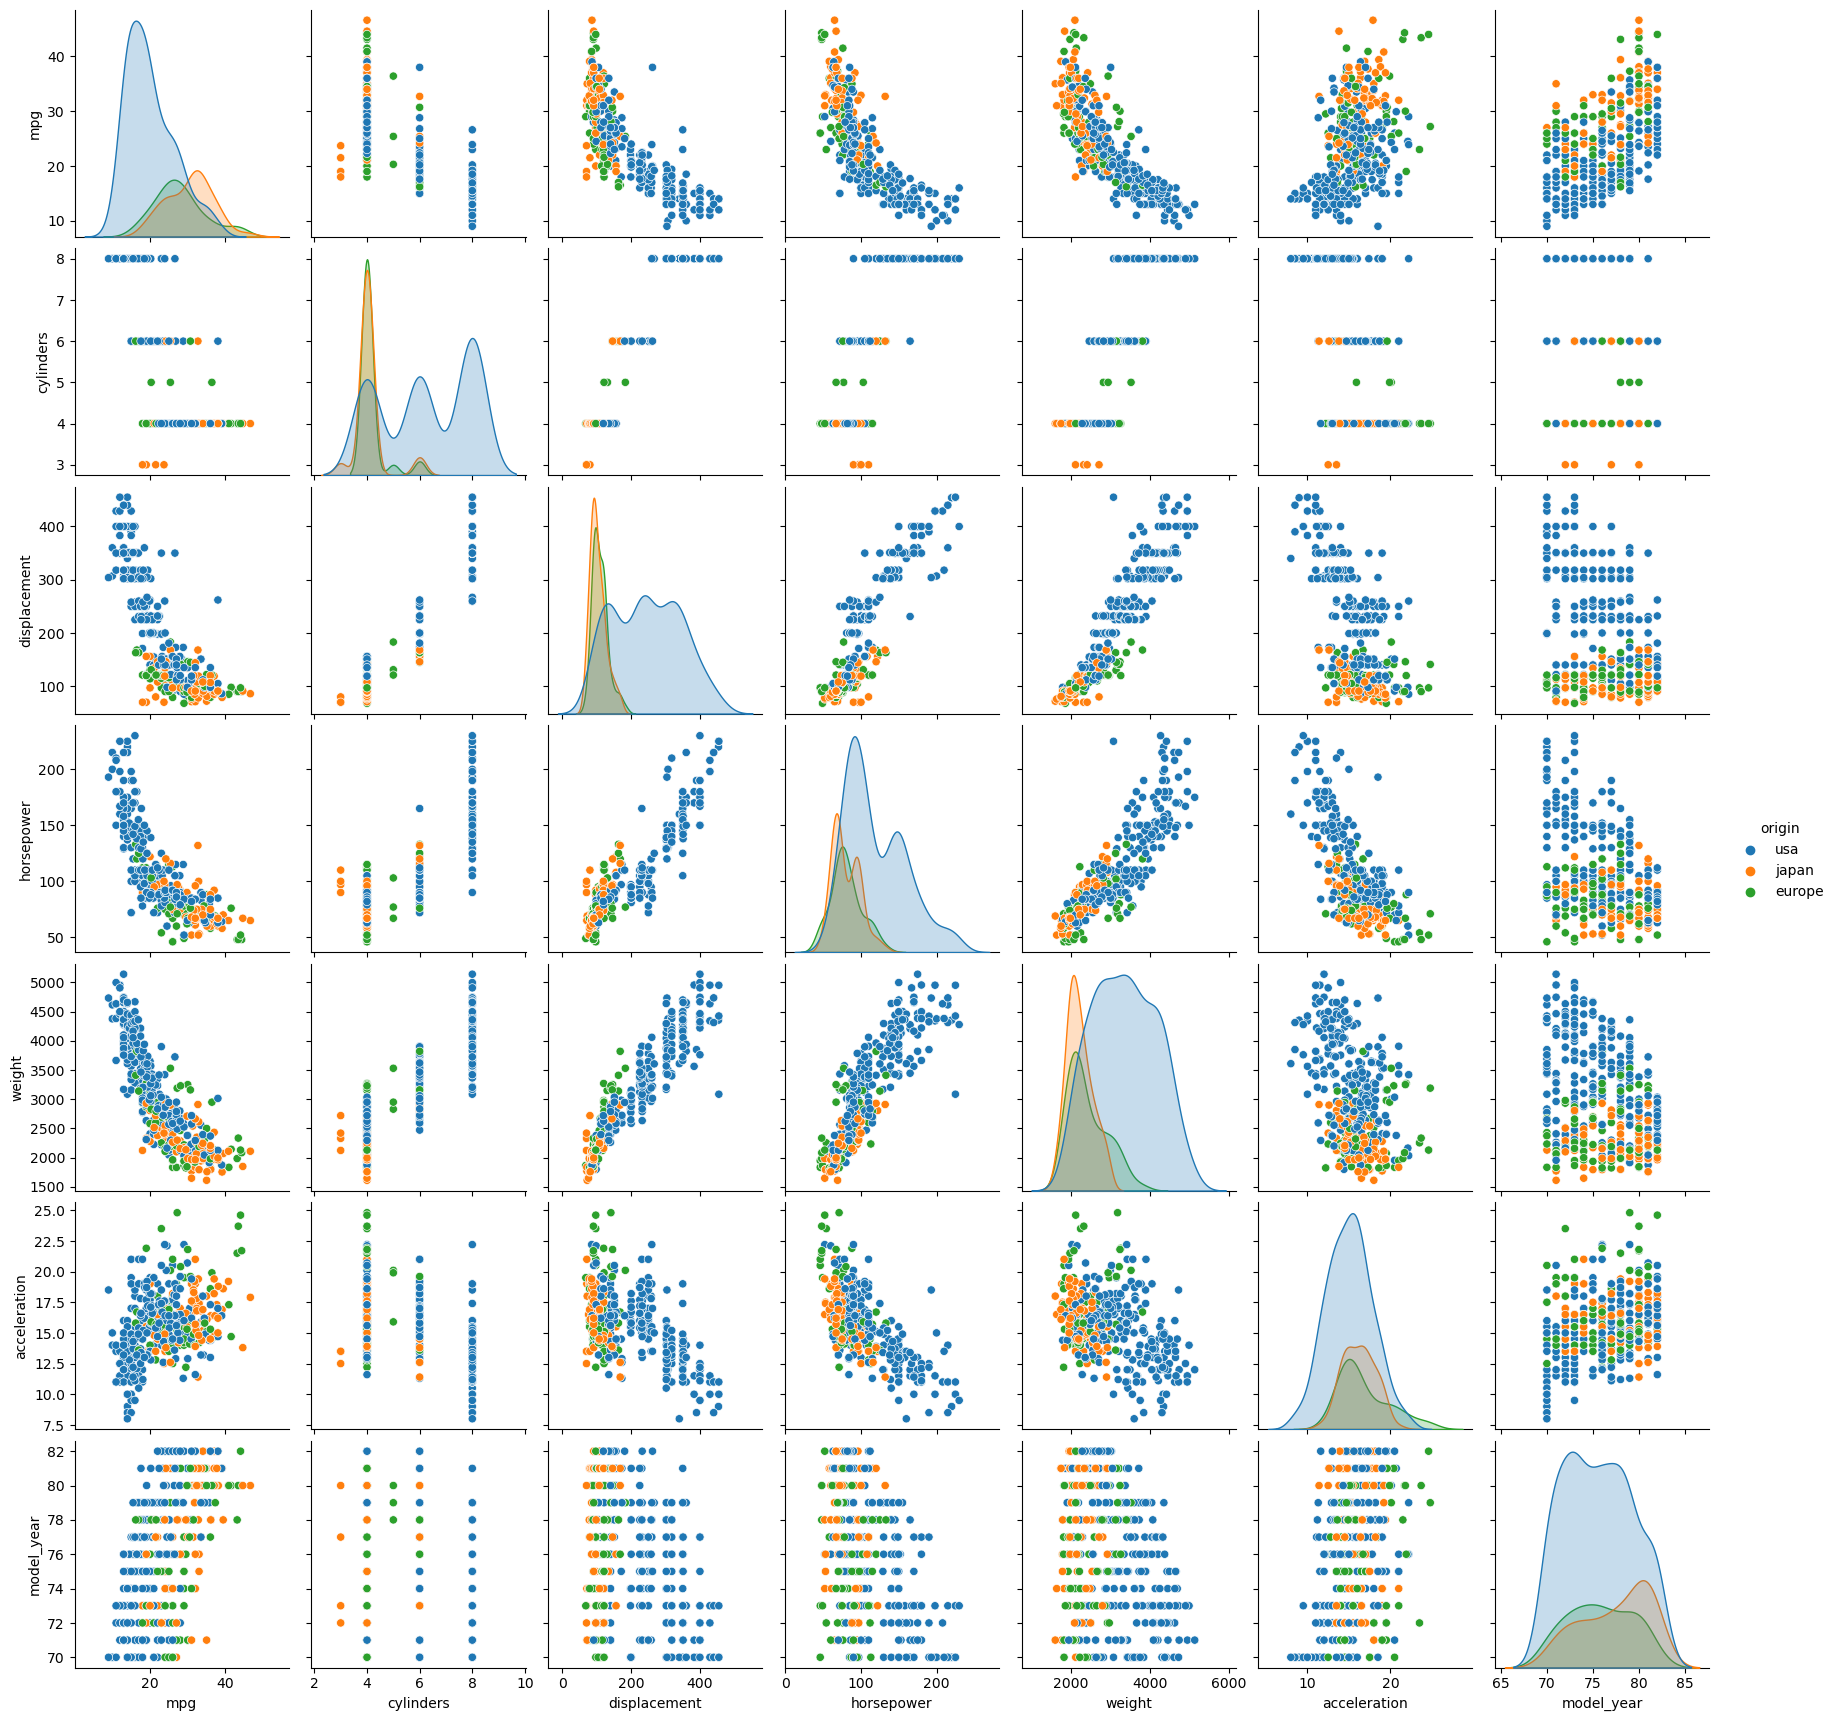

In [26]:
# 전체 데이터의 상관관게 보기
sns.pairplot(data=df, hue='origin')
plt.show()

## lineplot()
- 연속형 데이터들에 대한 관계를 보여주는데 적합한 그래프
- lineplot은 기본적으로 그래프를 그리기 전에 x값을 기준으로 데이터를 정렬하고 그래프를 그린다
- 동일한 x값에 대해 여러 개의 y값을 갖는 경우 각 x값에 대한 평균과 95%의 신뢰구간을 평균 주변으로 표시

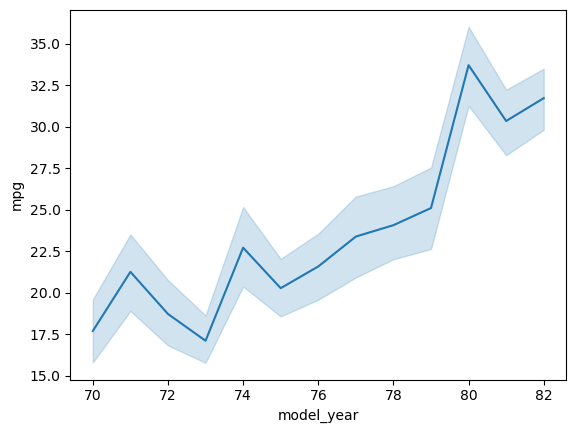

In [27]:
sns.lineplot(data=df, x='model_year', y='mpg')
plt.show()

## heatmap()
- 데이터의 상관관계 정도에 따라 색차이를 부여한 그래프

In [28]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
iris['species'].value_counts()   #unique값 별로 데이터 개수

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [33]:
iris.pivot_table(index='species')#, aggfunc=['mean', 'min','max'])  # 품종을 행에 넣고 나머지 데이터가 열의 값으로 재배치되는 테이블 생성, aggfunc: 집계함수

,petal_length,petal_width,sepal_length,sepal_width
species,,,,
setosa,1.462,0.246,5.006,3.428
versicolor,4.260,1.326,5.936,2.770
virginica,5.552,2.026,6.588,2.974


In [34]:
corr = iris.corr(numeric_only=True)  # 각 컬럼별 상관계수 추출
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


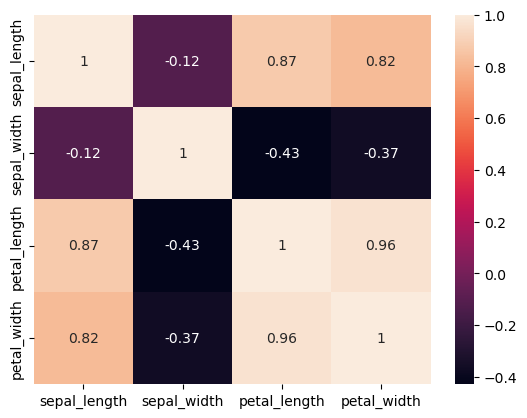

In [35]:
sns.heatmap(corr, annot=True)
plt.show()
# 꽃잎의 길이가 길면 꽃잎의 너비도 넓음

# 분포형 그래프

## 히스토그램
- bins: 최소 최대값 사이 몇 칸으로 나눠서 그릴지를 지정(데이터 구간의 개수)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


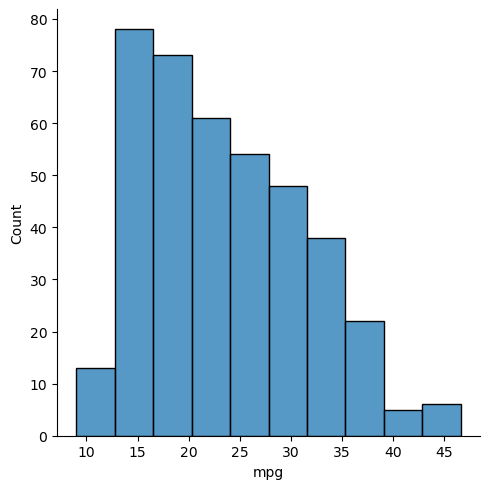

In [37]:
sns.displot(data=df, x='mpg', bins=10)
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


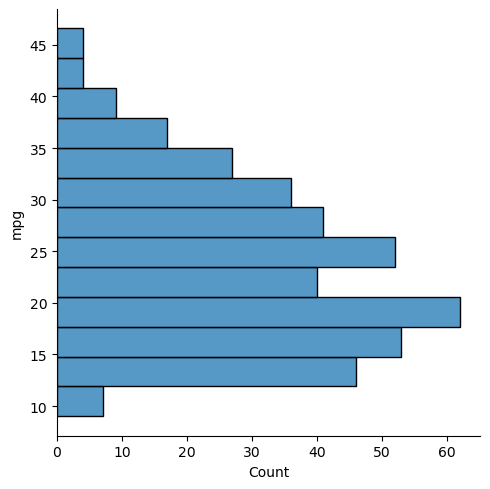

In [38]:
sns.displot(data=df, y='mpg')   # y 파라미터만 지정하면 수평으로 그려짐
plt.show()

## barplot()
- x축에는 범주형 변수, y축에는 연속형 변수 입력
- x축에 연속형, y축에 범주형 입력시 수평막대그래프를 그린다.
- estimator 에 집계함수 이름을 지정
  - 평균(기본값, np.mean), 합계(np.sum), 카운트(len), 중앙값(median), 표준편차(np.std)

In [46]:
# style 종류: default, ggplot, classic, bmh
plt.style.use('classic')

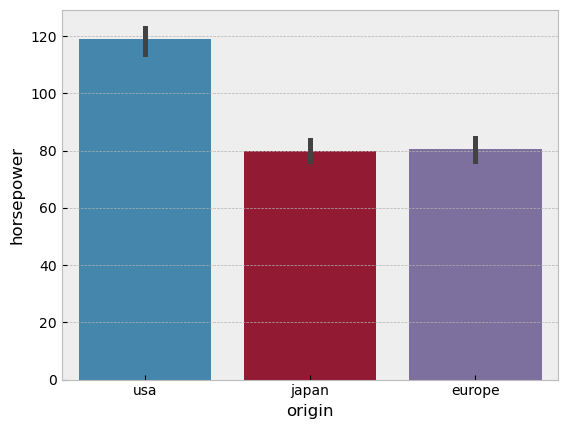

In [44]:
sns.barplot(data=df, x='origin', y='horsepower', estimator=np.mean)  # 각 제조국가별 마력의 평균을 막대그래프로 그려줌
plt.show()

## boxplot()

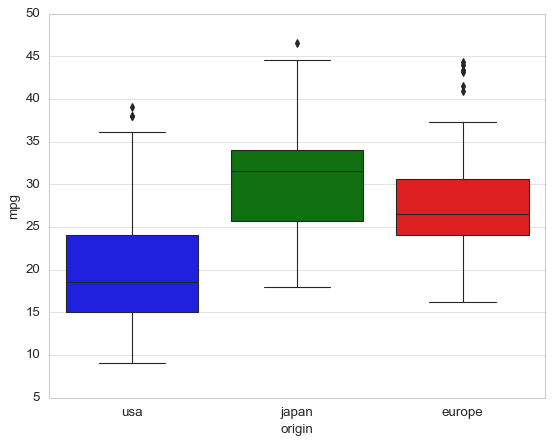

In [50]:
sns.set_style('whitegrid')   # grid 나타내기 
sns.boxplot(data=df, x='origin', y='mpg')
plt.show()

## violinplot()
- 데이터의 분포에 따라 통통하고 홀쭉하게 표현한 모습이 바이올린과 유사
- boxplot은 이상치를 한 눈에 파악하기에 용이하고 violinplot은 데이터의 분포를 한 눈에 파악하기에 용이

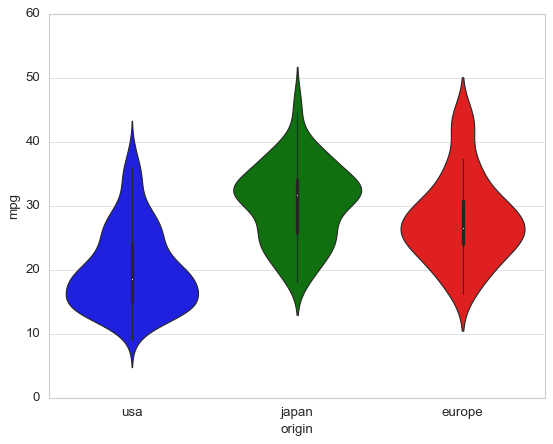

In [51]:
sns.violinplot(data=df, x='origin', y='mpg')
plt.show()